In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
from array import array
import math
import numpy as np
import random

c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.16/00


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [3]:
gStyle.SetOptFit(1)
m = 2 #Set the order of the polynomial
n = 15 #Set the number of data points

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[0.01776006 0.02839812 0.08540586]
 [0.02839812 0.08540586 0.50505615]
 [0.08540586 0.50505615 4.41616702]]
Constant matrix:
[[ 0.52]
 [ 4.72]
 [49.52]]
Inverse matrix
[[ 281.47699375 -189.69457199   16.25088566]
 [-189.69457199  164.01297905  -15.08881691]
 [  16.25088566  -15.08881691    1.6377956 ]]
Diagonal Check:
[[ 1.00000000e+00 -1.11813332e-15 -4.27555345e-18]
 [ 1.78920919e-15  1.00000000e+00  1.20544991e-17]
 [ 4.86797906e-15 -4.83626318e-17  1.00000000e+00]]
Coefficients:
[[ 55.75351476]
 [-71.69812971]
 [ 18.33488273]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = -2.967199  yfit = 2.390268
i = 1  y = 21.868525  yfit = -14.303214
i = 2  y = 37.789131  yfit = 5.673070
i = 3  y = 70.401230  yfit = 62.319120
i = 4  y = 137.207130  yfit = 155.634935
i = 5  y = 232.089432  yfit = 285.620515
i = 6  y = 373.557215  yfit = 452.275861
i = 7  y = 558.199767  yfit = 655.600972
i = 8  y = 797.179562  yfit = 895.595849
i = 9  y = 1063.848173  yfit = 1172.260491
i = 10  y = 1406.044467  yfit = 1485.594899
i = 11  y = 1818.294803  yfit = 1835.599072
i = 12  y = 2302.665751  yfit = 2222.273010
i = 13  y = 2861.115674  yfit = 2645.616715
i = 14  y = 3522.037515  yfit = 3105.630184
chi2/dof = 9.690575 / 12.000000


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 55.753515 +/- 16.777276
p1 = -71.698130 +/- 12.806755
p2 = 18.334883 +/- 1.279764


pol2
Fit 1: 9.690575 12.000000 



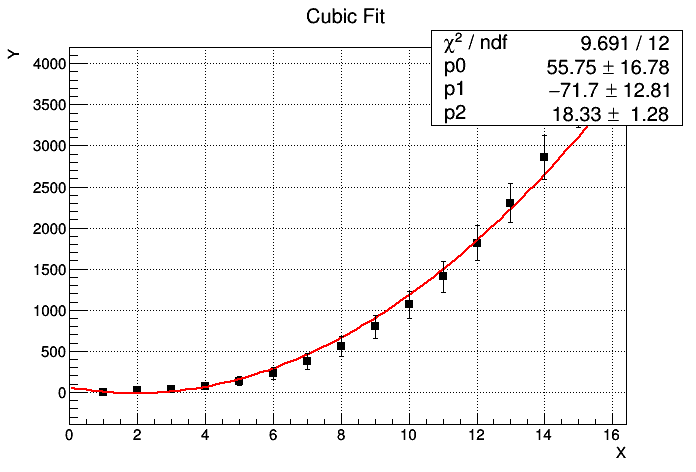

In [10]:
poltype = "pol"+str(m)
print (poltype)
gr = TGraphErrors(n,x,y,ex,ey)
pfit1 = TF1("pfit1",poltype)
gr.SetMarkerStyle(21)
gr.SetTitle("Cubic Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
c1.Draw()